# Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from tqdm import tqdm

# Matplotlib Style
style.use('ggplot') or plt.style.use('ggplot')

# Random Seed
RANDOM_STATE = 123

# Data

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- `CUSTID`: Identification of Credit Card holder (Categorical)
- `BALANCE`: Balance amount left in their account to make purchases (
- `BALANCEFREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- `PURCHASES` : Amount of purchases made from account
- `ONEOFFPURCHASES` : Maximum purchase amount done in one-go
- `INSTALLMENTSPURCHASES`: Amount of purchase done in installment
- `CASHADVANCE`: Cash in advance given by the user
- `PURCHASESFREQUENCY`: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- `ONEOFFPURCHASESFREQUENCY`: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
-  `PURCHASESINSTALLMENTSFREQUENCY`: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
-  `CASHADVANCEFREQUENCY`: How frequently the cash in advance being paid
-  `CASHADVANCETRX`: Number of Transactions made with "Cash in Advanced"
-  `PURCHASESTRX`: Numbe of purchase transactions made
-  `CREDITLIMIT`: Limit of Credit Card for user
-  `PAYMENTS`: Amount of Payment done by user
-  `MINIMUM_PAYMENTS`: Minimum amount of payments made by user
-  `PRCFULLPAYMENT`: Percent of full payment paid by user
-  `TENURE`: Tenure of credit card service for user

Source: [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata) 

In [2]:
path_credit = "credit_card_dataset"
file_credit = "CC GENERAL.csv"

In [3]:
# Open csv from path_credit
credit_card = pd.read_csv(os.path.join(path_credit, file_credit))
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

## Data Types

All variables are numerical(integer or float) except for `CUST_ID`.

In [4]:
# Column type
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Data Size and Missing Values

We have $8950$ observations(rows) and $21$ columns in the data set.

In [5]:
# Data Size
credit_card.shape

(8950, 18)

There are missing values in the columns `minimum_payments`, `cash_advance`, `activated_date`, `last_payment_date`, `balance`, `credit_limit`.

In [6]:
# Missing Values Percentage
missing_values = credit_card.isna().mean().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]*100
missing_values

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64

Text(0.5, 1.0, 'Missing Values in Percentage')

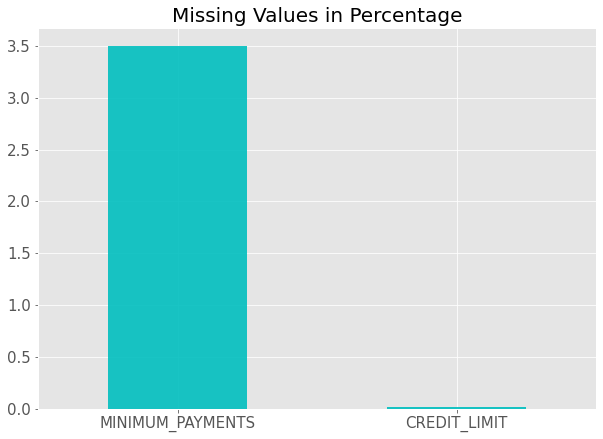

In [7]:
# Plot Missing Values
miss_plot = missing_values.plot.bar(figsize = (10, 7), 
                                    fontsize = 15, 
                                    color = "c", 
                                    alpha = 0.9,
                                    rot = 0)
miss_plot.set_title("Missing Values in Percentage", fontdict = {'fontsize': 20})

## Box Plots of Features

Most of the features have outliers then it could be better apply K-mediods instead of K-means.

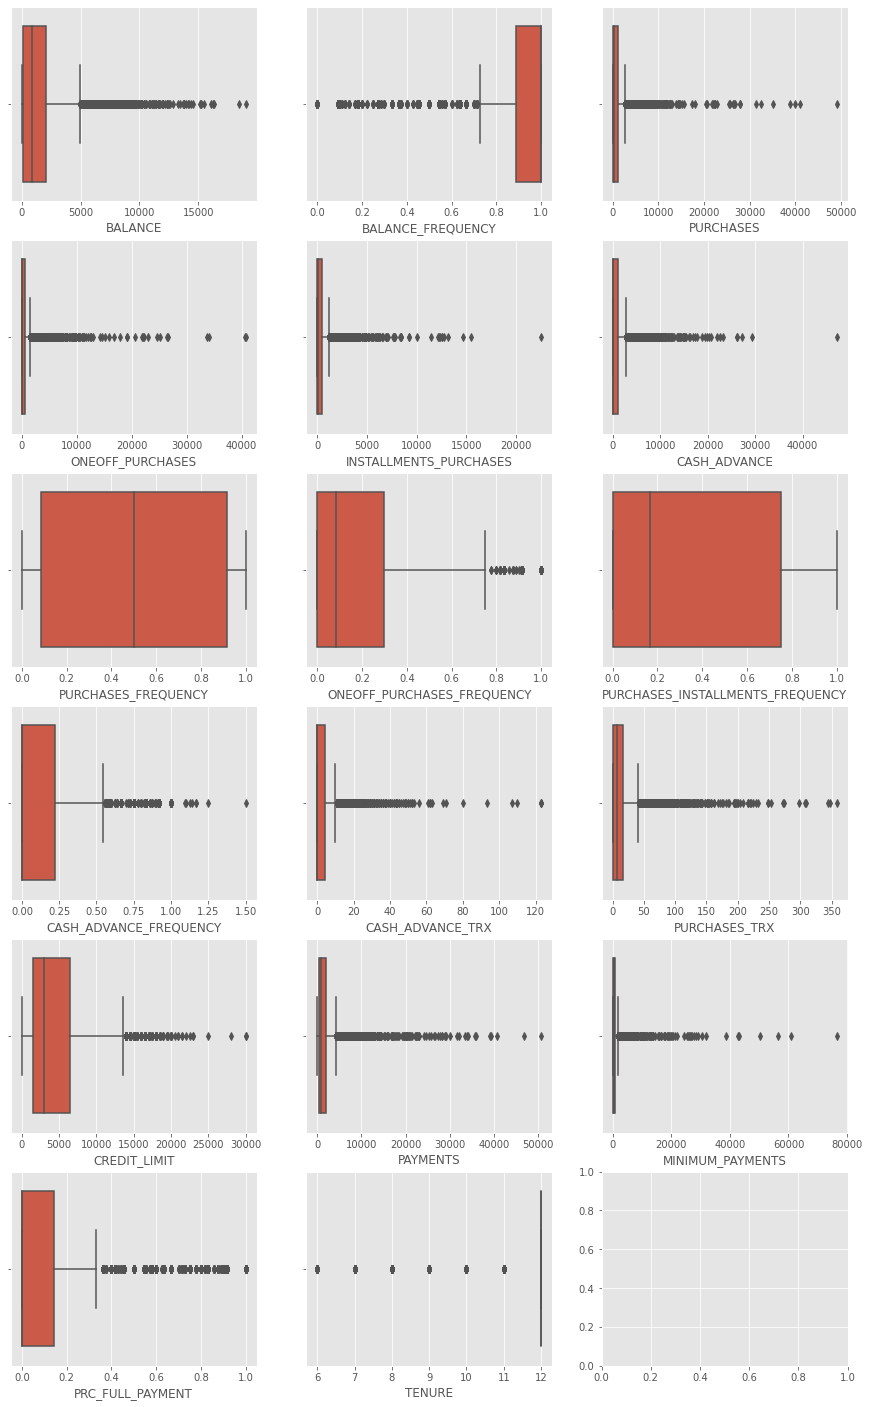

In [8]:
# Box Plots
fig, axes = plt.subplots(nrows = 6, ncols=3, figsize=(15, 25))
axes = axes.flat
cols = credit_card.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(cols):
    sns.boxplot(x = credit_card[col], ax = axes[i])

# Data Preparation

## Neccesary Data

We can drop the `CUST_ID` column beacuse it is not necessary for the clustering.

In [9]:
credit_card_costumer = credit_card["CUST_ID"]
credit_card = credit_card.drop("CUST_ID", axis = 1)

## Filling Missing Values

In [10]:
imp_median = SimpleImputer(missing_values = np.nan, strategy = "mean")
X = imp_median.fit_transform(credit_card)

In [11]:
np.isnan(X).sum()

0

## Data Normalization

If a variable has a much larger scale than the rest, it will largely determine the distance/similarity value obtained when comparing observations, thus driving the final clustering. Scaling and centering the variables before calculating the distance matrix so that they have mean 0 and standard deviation 1, ensures that all variables have the same weight when clustering is performed.

The most common way to achieve this is the normalization:

$$\frac{x_i - mean(x)}{std(x)}$$

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means

## PCA to view the "clusters"

Take the `n_components` of PCA such that it represents at least the $90\%$ of the variance.

In [13]:
# Your code here
pca = PCA(n_components = 0.9, random_state = RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

We need just $10$ Principal Components to achieve to explain at least the $90\%$ of the variance.

In [14]:
X_pca.shape

(8950, 10)

In [15]:
print("The PCA enplain the:", round(pca.explained_variance_ratio_.sum(), 4), "% of the variance.")

The PCA enplain the: 0.9193 % of the variance.


No clusters are visible with $K = 2$

Text(0.5, 1.0, 'Two Components of PCA \n $var\\_explained = $0.4759 with $K = 2$')

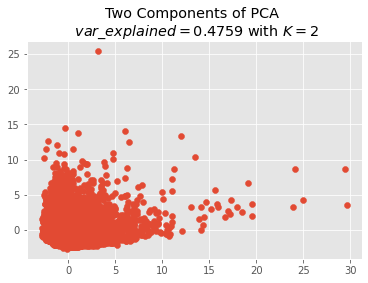

In [16]:
var_explained_2 = round(pca.explained_variance_ratio_[0:2].sum(), 4)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title(f"Two Components of PCA \n $var\_explained = ${var_explained_2} with $K = 2$")

## Number of clusters

### Elbow Method

In [22]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in tqdm(range_n_clusters):
    model_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = RANDOM_STATE
                    )
    model_kmeans.fit(X_scaled)
    inertias.append(model_kmeans.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:25<00:00,  1.79s/it]


It is not clear in what is the best $K$ value, then we need to use the formaly Elbow Method.

Text(0, 0.5, 'Intra-cluster (inertia)')

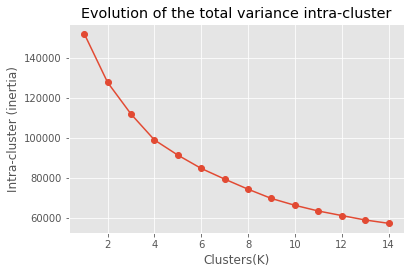

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolution of the total variance intra-cluster")
ax.set_xlabel('Clusters(K)')
ax.set_ylabel('Intra-cluster (inertia)')

When working with k-means, we optimize the sum of squared distances between the observations and their centroids.

$$J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_K,$$

where $C$ – is a set of clusters with power $K$, $\mu_k$ is a centroid of a cluster $C_k$.

In the Elbow Method, we choose a number of clusters after which a function $J(C_k)$ is decreasing less rapidly. More formally,
$$D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

In [55]:
# Elbow Method
df_inertias = pd.DataFrame({"elbow": inertias})
elbow = (df_inertias.shift(-1) - df_inertias.shift(-2))/(df_inertias - df_inertias.shift(-1))
elbow["K"] = range(2, len(elbow) + 2)
elbow[elbow.elbow.min() == elbow.elbow]

,elbow,K
2,0.586334,4


In this case $K = 4$

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

A partir de 4 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que K = 4 es una buena opción.

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

El valor medio de los índices silhouette se maximiza con 4 clusters. Acorde a este criterio, K = 4 es la mejor opción.

Ambos criterios, elbow y silhouette, identifican el valor K= como valor óptim

# Unsupervised Learning

The main feature of unsupervised learning algorithms, when compared to classification and regression methods, is that input data are unlabeled (i.e. no labels or classes given) and that the algorithm learns the structure of the data without any assistance.

**Advantage:**
- Process large amounts of data because the data does not need to be manually labeled.

**Disadvantage:**
- It is difficult to evaluate the quality of an unsupervised algorithm due to the absence of an explicit goodness metric as used in supervised learning

# Clustering

The main idea behind clustering is pretty straightforward. Basically, we say to ourselves, "**I have these points here, and I can see that they organize into groups. It would be nice to describe these things more concretely, and, when a new point comes in, assign it to the correct group.**"